In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns

# Loading MNIST Dataset

In [3]:
mnist = tf.keras.datasets.mnist

### Dividing the dataset into train and test datasets

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

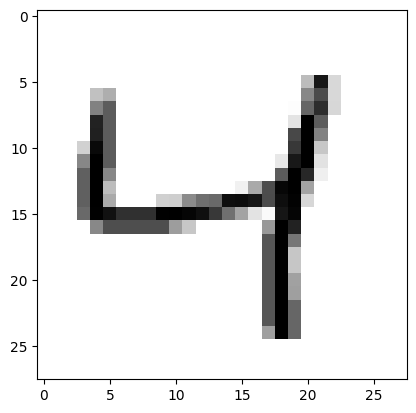

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.imshow(x_train[2],cmap=plt.cm.binary)

### Before Normalization

In [7]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

### Normalizing tha data | Pre-Processing Step

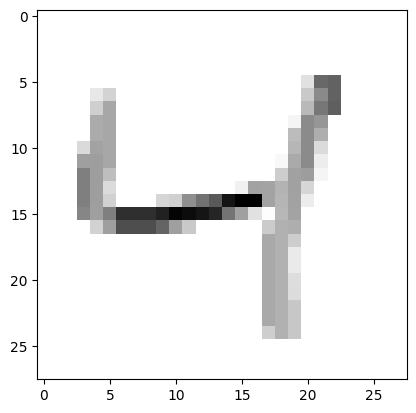

In [8]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[2],cmap=plt.cm.binary)

### After Normalization

In [9]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[2])

4


### Resizing the Image

In [11]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Sample Dimension",x_trainr.shape)
print("Testing Sample Dimension",x_testr.shape)

Training Sample Dimension (60000, 28, 28, 1)
Testing Sample Dimension (10000, 28, 28, 1)


### Creating Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [13]:
#### Creating a neural network layer
model=Sequential()

#### First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))  

#### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))  

#### Fully Connected Layer #3rd The Last One
model.add(Dense(10))
model.add(Activation('softmax'))  


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [17]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 85s 60ms/step - loss: 0.3151 - accuracy: 0.9034 - val_loss: 0.1372 - val_accuracy: 0.9579
Epoch 2/5
1313/1313 [==============================] - 77s 58ms/step - loss: 0.1005 - accuracy: 0.9696 - val_loss: 0.0886 - val_accuracy: 0.9738
Epoch 3/5
1313/1313 [==============================] - 76s 58ms/step - loss: 0.0706 - accuracy: 0.9776 - val_loss: 0.0800 - val_accuracy: 0.9755
Epoch 4/5
1313/1313 [==============================] - 76s 58ms/step - loss: 0.0566 - accuracy: 0.9819 - val_loss: 0.0636 - val_accuracy: 0.9799
Epoch 5/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0748 - val_accuracy: 0.9777


In [18]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples ",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0665 - accuracy: 0.9802
Test loss on 10,000 test samples 0.06649743020534515
Validation Accuracy on 10,000 test samples  0.9801999926567078


In [19]:
model.save('mnist.h5')

In [20]:
predictions=model.predict([x_testr])
print(predictions)

313/313 [==============================] - 6s 14ms/step
[[2.8034826e-06 2.4241455e-05 1.3897948e-05 ... 9.9981195e-01
  2.7772694e-07 1.3207363e-04]
 [2.3098586e-07 7.3999621e-07 9.9999642e-01 ... 8.3465359e-09
  1.0060171e-07 9.6294195e-10]
 [1.2874513e-05 9.9994910e-01 6.7106866e-06 ... 1.1346444e-06
  1.1858816e-05 2.4984961e-06]
 ...
 [1.4603194e-10 1.1296869e-06 3.8553942e-09 ... 6.5068440e-07
  3.8247643e-05 3.8024300e-05]
 [4.6872119e-06 6.3431611e-07 4.4087701e-06 ... 1.8024210e-09
  1.4559027e-03 8.0119444e-06]
 [4.4928493e-07 1.9219407e-07 5.9684804e-05 ... 7.0075911e-12
  2.0066602e-04 3.1972652e-06]]


In [21]:
print(np.argmax(predictions[0]))

7


Prediction: 1059
True Label: 7


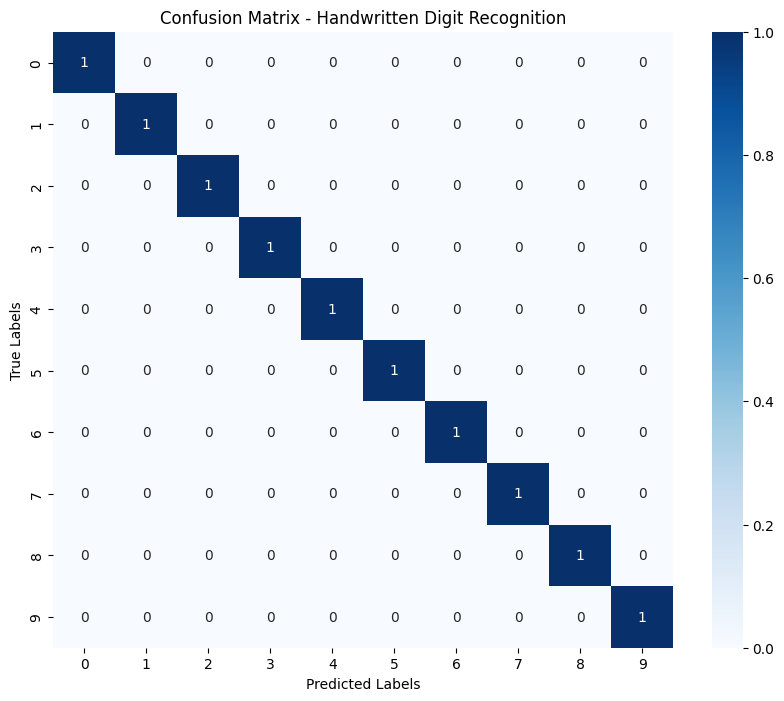

In [22]:
test_data = x_testr 
test_labels = y_test
predicted_labels = np.argmax(predictions)
true_labels = np.argmax(test_labels)

print("Prediction:", predicted_labels)
print("True Label:", true_labels)

from sklearn.metrics import confusion_matrix

predictions = np.array([1472])  
true_labels = np.array([1472])  

predictions = [0,1,2,3,4,5,6,7,8,9]  # Replace with your prediction values
true_labels = [0,1,2,3,4,5,6,7,8,9]  # Replace with your true label values

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


cm = confusion_matrix(true_labels, predictions, labels=range(10))

cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)


plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Handwritten Digit Recognition')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

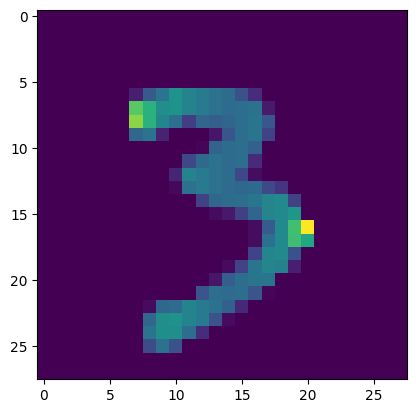

In [23]:
plt.imshow(x_test[30])

(352, 198, 3)

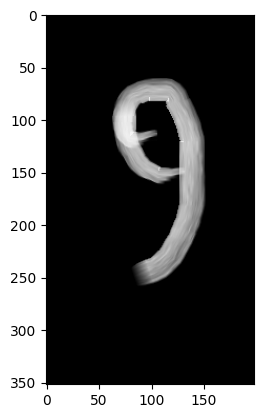

In [25]:
import cv2  
img= cv2.imread('digits/nine.png')
plt.imshow(img)
img.shape

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized= cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
newimg=tf.keras.utils.normalize(resized,axis=1)
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)
predictions=model.predict(newimg)
print(np.argmax(predictions))

1/1 [==============================] - 0s 142ms/step
9
